In [1]:
import pandas as pd

C:\Users\diego\AppData\Local\Temp\ipykernel_25260\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
station = "mrlb"
data = pd.read_csv(f"data/{station}/metars.csv")
data.head()

C:\Users\diego\AppData\Local\Temp\ipykernel_22564\2296388491.py:2: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"data/{station}/metars.csv")


,Year,Month,Day,Hour,Minute,Station,Wind_direction,Wind_speed,Wind_gust,Visibility,...,Sky_layer2_cloud,Sky_layer3_cover,Sky_layer3_height,Sky_layer3_cloud,Sky_layer4_cover,Sky_layer4_height,Sky_layer4_cloud,Temperature,Dewpoint,Pressure
0,2005,1,1,1,0,MRLB,80.0,15.0,NaN,10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,19.0,29.84
1,2005,1,1,13,0,MRLB,30.0,4.0,NaN,10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,20.0,29.90
2,2005,1,1,14,0,MRLB,50.0,4.0,NaN,10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,20.0,29.92
3,2005,1,1,15,0,MRLB,60.0,16.0,NaN,10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,20.0,29.94
4,2005,1,1,16,0,MRLB,70.0,14.0,NaN,10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,20.0,29.93


In [3]:
data["Pressure"].max()

30.11

In [4]:
data["Pressure"].min()

29.6

In [5]:
p_anomalies = data.query("Pressure < 29.60 or Pressure > 30.20")
p_anomalies.head()

,Year,Month,Day,Hour,Minute,Station,Wind_direction,Wind_speed,Wind_gust,Visibility,...,Sky_layer2_cloud,Sky_layer3_cover,Sky_layer3_height,Sky_layer3_cloud,Sky_layer4_cover,Sky_layer4_height,Sky_layer4_cloud,Temperature,Dewpoint,Pressure


In [6]:
station = "mrlb"
data = pd.read_csv(f"data/{station}/metars.csv")

data_ts = data.query("Weather_description == 'TS'")

C:\Users\diego\AppData\Local\Temp\ipykernel_22564\3576225516.py:2: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"data/{station}/metars.csv")


In [2]:
from clima.graphics.bar_plots_selective import bar_plot_selective

def weather_col_name(var: str):
    col_name = "Weather_"
    var_name = "Tormentas"
    if var in "SHTS":
        col_name += "description"
    if var in "RADZ":
        col_name += "precipitation"
    if var in "BRFG":
        col_name += "obscuration"
    if var == "SH":
        var_name = "Chubascos"
    if var == "RA":
        var_name = "Lluvia"
    if var == "DZ":
        var_name = "Llovizna"
    if var == "BR":
        var_name == "Neblina"
    if var == "FG":
        var_name = "Niebla"
    return col_name, var_name

C:\Users\diego\AppData\Local\Temp\ipykernel_25260\2676364894.py:2: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"data/{station}/metars.csv")
c:\Users\diego\development\python\climatologias-aeropuertos\clima\graphics\bar_plots_selective.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour1_24"] = df["Hour"].replace(0, 24)


Weather_description Chubascos
SH count for month 1 -> 2
SH count for month 2 -> 0
SH count for month 3 -> 8
SH count for month 4 -> 60
SH count for month 5 -> 294
SH count for month 6 -> 354
SH count for month 7 -> 193
SH count for month 8 -> 269
SH count for month 9 -> 418
SH count for month 10 -> 484
SH count for month 11 -> 241
SH count for month 12 -> 44
Relevant months: [5, 6, 7, 8, 9, 10, 11]


2025/02/05 01:26:41 PM: INFO [category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025/02/05 01:26:41 PM: INFO [category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[0.         0.         0.         0.         0.00714286 0.00714286
 0.02142857 0.06428571 0.02857143 0.04285714 0.02857143 0.05
 0.04285714 0.00714286 0.01428571 0.         0.         0.
 0.        ]


c:\Users\diego\development\python\climatologias-aeropuertos\clima\graphics\bar_plots_selective.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_time_list(hours))


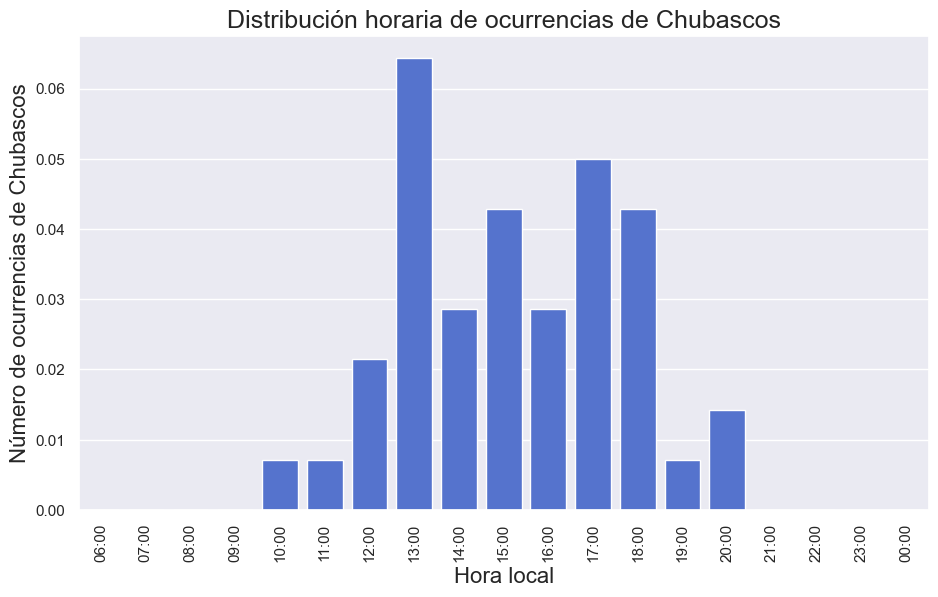

In [5]:
station = "mrlb"
data = pd.read_csv(f"data/{station}/metars.csv")
weather_var = "SH"
weather_col, weather_name = weather_col_name(weather_var)
print(weather_col, weather_name)

weather_df = data.query(f"{weather_col} == '{weather_var}'")

if weather_var == "RA":
    weather_df = weather_df.query(
        'Weather_description != "SH" and Weather_description != "TS"'
    )

months = [m for m in range(1, 13)]
relevant_months = []

for month in months:
    month_df = weather_df.query(f"Month == {month}")
    phenomena_count = month_df[weather_col].count()
    if phenomena_count >= 100:
        relevant_months.append(month)
    print(f"{weather_var} count for month {month} -> {phenomena_count}")

print(f"Relevant months: {relevant_months}")

bar_plot_selective(data, station, weather_col, relevant_months, weather=weather_var, bp_label=weather_name)